# Car Sales. Clusterization problem

Dataset was taken from the Kaggle.

## Imports and Data Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the dataset
df = pd.read_csv('data.csv')

# Dropping unnecessary columns
df.drop(['Car_id', 'Date', 'Customer Name', 'Phone', 'Dealer_No '], inplace=True, axis=1)

# Checking for null values and dataset shape
print(df.isnull().sum())
print(df.shape)

Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64
(23906, 11)


In [6]:
df.head()

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [7]:
df.describe()

,Annual Income,Price ($)
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         23906 non-null  object
 1   Annual Income  23906 non-null  int64 
 2   Dealer_Name    23906 non-null  object
 3   Company        23906 non-null  object
 4   Model          23906 non-null  object
 5   Engine         23906 non-null  object
 6   Transmission   23906 non-null  object
 7   Color          23906 non-null  object
 8   Price ($)      23906 non-null  int64 
 9   Body Style     23906 non-null  object
 10  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


## Encoding Categorical Data

In [9]:
# Encoding categorical columns
columns_to_encode = ['Color', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Body Style', 'Dealer_Region']
df_encoded = df.copy()
label_encoders = {}

for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    df_encoded[col + '_encoded'] = label_encoders[col].fit_transform(df[col])

# Dropping original columns after encoding
df_encoded = df_encoded.drop(columns_to_encode, axis=1)

In [10]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

n_rows = int(len(columns_to_encode) / 2) + (len(columns_to_encode) % 2)

fig = make_subplots(rows=n_rows, cols=2, subplot_titles=[f'{col} Encoded Values' for col in columns_to_encode])

current_row = 1
current_col = 1

for col in columns_to_encode:
    encoded_values = [i for i, _ in enumerate(label_encoders[col].classes_)]
    categories = label_encoders[col].classes_
    
    trace = go.Bar(x=categories, y=encoded_values, marker=dict(color=px.colors.qualitative.Pastel1))
    fig.add_trace(trace, row=current_row, col=current_col)
    
    if current_col == 1:
        current_col = 2
    else:
        current_col = 1
        current_row += 1

fig.update_layout(height=600*n_rows, showlegend=False, title_text="Categorical Columns and Their Encoded Values")
fig.show()


## Data Visualization

In [11]:
# Scatter Plot of Numerical Values 

import plotly.express as px
fig = px.scatter(df, x='Annual Income', y='Price ($)', labels={'Price ($)': 'Price of Car', 'Annual Income': 'Annual Income of Person'}, title='Car Price vs. Annual Income')

# Show the plot
fig.show()

In [12]:
# Box Plots for Price and Annual Income
fig = make_subplots(rows=1, cols=2, subplot_titles=("Price ($)", "Annual Income"))

fig.add_trace(go.Box(y=df_encoded['Price ($)'], name='Price ($)'), row=1, col=1)
fig.add_trace(go.Box(y=df_encoded['Annual Income'], name='Annual Income'), row=1, col=2)

fig.update_layout(title_text="Box Plots for Price and Annual Income", title_x=0.5)
fig.show()

In [13]:
# Annual Income and Car Price Distribution

fig = make_subplots(rows=1, cols=2, subplot_titles=("Annual Income", "Price ($)"))

fig.add_trace(go.Histogram(x=df_encoded['Annual Income'], name='Annual Income'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_encoded['Price ($)'], name='Price ($)'), row=1, col=2)

fig.update_layout(title_text="Annual Income and Price Distribution", title_x=0.5, showlegend=False)
fig.update_traces(opacity=0.75)
fig.show()

In [14]:
# Correlation Heatmap
import plotly.figure_factory as ff
corr_matrix = df_encoded.corr()

fig = ff.create_annotated_heatmap(
    z=corr_matrix.to_numpy(),
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.columns.tolist(),
    colorscale='RdBu',
    showscale=True,
    annotation_text=corr_matrix.round(2).to_numpy().astype(str),
    hoverinfo="z"
)

fig.update_layout(
    title_x=0.5,
    margin=dict(l=10, r=10, t=30, b=10)
)
fig.show()

In [18]:
# Distribution of Gender
import plotly.express as px

gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.bar(gender_counts, x='Gender', y='Count', text='Count')

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    title='Distribution of Gender',
    xaxis_tickangle=-45
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [19]:
# Top 5 Female Model Preferences
female_df = df[df["Gender"] == 'Female']
top_female_models = female_df['Model'].value_counts().head(5).reset_index()
top_female_models.columns = ['Model', 'Count']

fig = px.bar(top_female_models, x='Model', y='Count', text='Count')

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Count',
    title='Top 5 Female Model Preferences',
    xaxis_tickangle=-45
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


In [20]:
# Top 5 Male Model Preferences
male_df = df[df["Gender"] == 'Male']
top_male_models = male_df['Model'].value_counts().head(5).reset_index()
top_male_models.columns = ['Model', 'Count']

fig = px.bar(top_male_models, x='Model', y='Count', text='Count')

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Count',
    title='Top 5 Male Model Preferences',
    xaxis_tickangle=-45
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


In [21]:
# Counts by Transmission Type and Gender

import plotly.graph_objs as go

female_df = df[df["Gender"] == 'Female']
male_df = df[df["Gender"] == 'Male']

# Get the counts for 'Transmission' type for females and males.
female_transmission_counts = female_df['Transmission'].value_counts()
male_transmission_counts = male_df['Transmission'].value_counts()

categories = female_transmission_counts.index.intersection(male_transmission_counts.index)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=categories,
    y=[female_transmission_counts[category] for category in categories],
    name='Female',
    marker=dict(color='pink')
))

fig.add_trace(go.Bar(
    x=categories,
    y=[male_transmission_counts[category] for category in categories],
    name='Male',
    marker=dict(color='blue')
))

fig.update_layout(
    title='Counts by Transmission Type and Gender',
    xaxis_title='Transmission Type',
    yaxis_title='Counts',
    legend_title='Gender',
    barmode='group'
)

fig.show()


In [22]:
# Top Car Companies among High Income Buyers

incomeQ3 = df['Annual Income'].quantile(0.75)
hige_income = df[df['Annual Income']>=incomeQ3]

top_company = hige_income['Company'].value_counts().head(5)

# Convert the Series to a DataFrame for easier plotting with Plotly.
top_company_df = top_company.reset_index()
top_company_df.columns = ['Company', 'Count']

fig = px.bar(top_company_df, x='Company', y='Count', text='Count', title='Top Car Companies among High Income Buyers')

# Update the layout to make it more polished.
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="Count",
    xaxis_tickangle=-45
)

# Configure the bar text to be displayed above the bars.
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()


In [23]:
# Top 4 Models, Companies and Car Body Styles amoung all customers

top_model_series = df['Model'].value_counts().head(5)
top_company_series = df['Company'].value_counts().head(5)
top_body_style_series = df['Body Style'].value_counts().head(5)

top_model_df = top_model_series.reset_index()
top_model_df.columns = ['Model', 'Count']

top_company_df = top_company_series.reset_index()
top_company_df.columns = ['Company', 'Count']

top_body_style_df = top_body_style_series.reset_index()
top_body_style_df.columns = ['Body Style', 'Count']

# Create the subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('Top 5 Models', 'Top 5 Companies', 'Top 5 Body Styles'))

fig.add_trace(go.Bar(x=top_model_df['Model'], y=top_model_df['Count'], text=top_model_df['Count'], name='Top Models'), row=1, col=1)
fig.add_trace(go.Bar(x=top_company_df['Company'], y=top_company_df['Count'], text=top_company_df['Count'], name='Top Companies'), row=1, col=2)
fig.add_trace(go.Bar(x=top_body_style_df['Body Style'], y=top_body_style_df['Count'], text=top_body_style_df['Count'], name='Top Body Styles'), row=1, col=3)

fig.update_layout(
    title_text="Top 5 Models, Companies, and Body Styles",
    showlegend=False,
    title_x=0.5
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [24]:
# Income Distribution by Dealer Region

income_per_dealer_region = df.groupby('Dealer_Region')['Price ($)'].sum().reset_index()
colors = px.colors.qualitative.Pastel

fig = px.pie(income_per_dealer_region,
             values='Price ($)',
             names='Dealer_Region',
             title='Income Distribution by Dealer Region',
             color_discrete_sequence=colors)
fig.show()

## Clasterisation Task - Separate Customers by Groups

### K-means

In [36]:
# Imports
import warnings
warnings.filterwarnings('ignore')

#### Data scaling and applying PCA for dimentionality reduction

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
print('First five examples:', X_scaled[:5])

First five examples: [[-1.1352085  -0.14134395 -1.21755526  0.52127827 -1.95982596 -0.71309728
  -0.40584758 -0.94956752 -0.94956752  0.65180381  0.52654267]
 [ 0.90162156 -0.61468862 -1.21755526  0.52127827 -1.83633599 -0.82795736
  -0.58777804 -0.94956752 -0.94956752  0.65180381 -1.48705927]
 [ 0.28355857  0.23056971  1.57554291  0.52127827 -1.71284603 -1.1725376
  -0.4740715   1.053111    1.053111   -0.10365153 -0.4802583 ]
 [-1.1352085  -0.95279195  0.17899383  0.52127827 -1.46586609  1.46924426
  -0.95163896  1.053111    1.053111    0.65180381  1.02994316]
 [ 0.88078798 -0.24277495  1.57554291  0.52127827 -1.58935606 -1.63197792
   1.43619832 -0.94956752 -0.94956752 -0.85910687  0.02314219]]


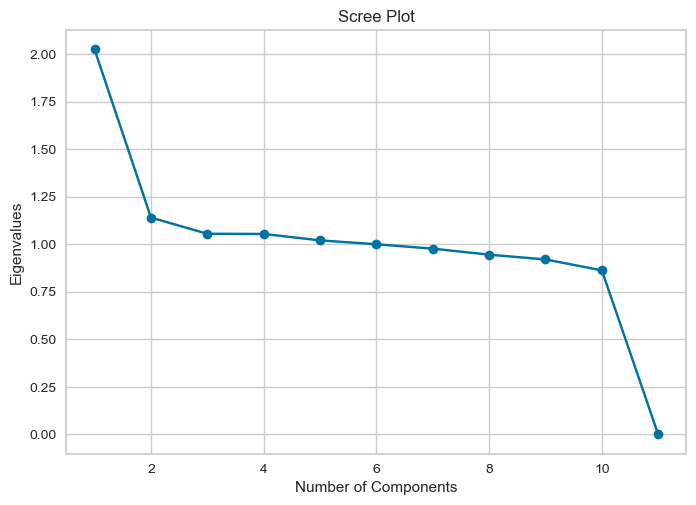

In [39]:
# Using elbow method find the optimal number of components for PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)
eigenvalues = pca.explained_variance_

plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()


In [40]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### Elbow methid to find the optimal number of clusters for K-Means

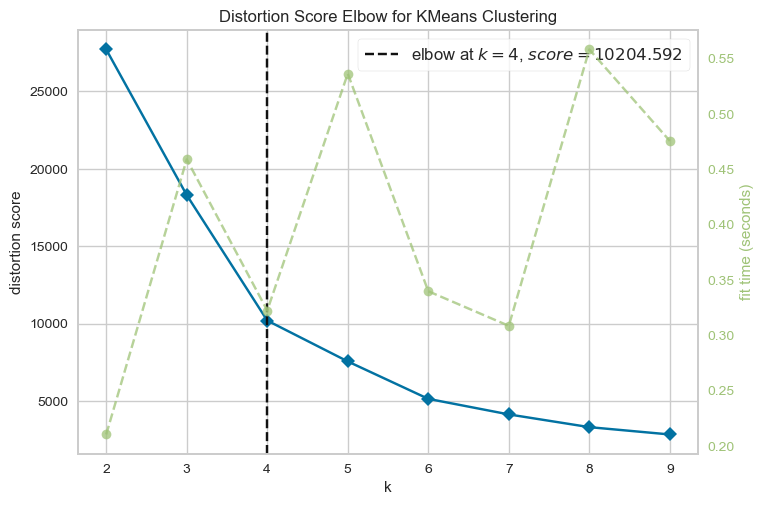

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10), locate_elbow=True)
visualizer.fit(X_pca)
visualizer.poof()

**We can see from the graph that we should use 4 clusters, according to the elbow method.**

In [41]:
# Defining the model and fitting PCA data
model = KMeans(n_clusters=4)
model.fit(X_pca)

KMeans(n_clusters=4)

In [42]:
# We can check the centers of each cluster now
model.cluster_centers_

array([[-1.41942822, -0.85047339],
       [ 1.55141154,  0.71591326],
       [ 1.41890258, -0.97392452],
       [-1.27559251,  0.87564801]])

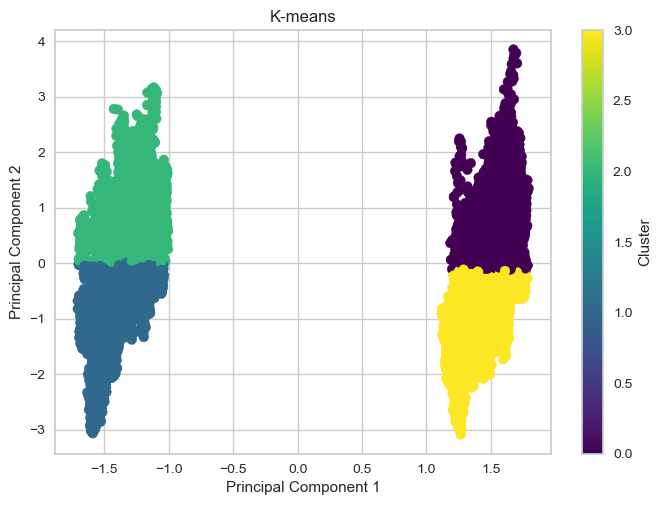

In [102]:
# Let's visualize our clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis')
plt.title('K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# Now we can add the column "Number of clusters" to the initial DataFrame
clusters = model.fit_predict(X_pca)
df['Number of cluster'] = clusters
df

,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Number of cluster
0,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1
1,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1
2,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,3
3,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,3
4,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,2
...,...,...,...,...,...,...,...,...,...,...,...,...
23901,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco,0
23902,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown,1
23903,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale,3
23904,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin,1


In [52]:
# Convert Data back to normal Dimension
original_space_centroids = scaler.inverse_transform(pca.inverse_transform(model.cluster_centers_))
centroids_df = pd.DataFrame(original_space_centroids, columns=df_encoded.columns)
original_space_means = np.mean(scaler.inverse_transform(X_scaled), axis=0)

inverse_label_encoders = {col: le.inverse_transform(df_encoded[col + '_encoded'].unique()) for col, le in label_encoders.items()}

for i, centroid in centroids_df.iterrows():
    print(f"Cluster {i}:")
    diff = centroid - original_space_means
    characteristics = diff.abs().sort_values(ascending=False)
    
    for column, value in characteristics.head(10).items():
        if column.endswith('_encoded'):
            col_name = column[:-len('_encoded')]  # Extract original column name
            original_value = inverse_label_encoders[col_name][int(centroid[column])]  # Decode the value
        else:
            col_name = column  # Store column name directly if it's not encoded
            original_value = value  # For non-encoded variables, keep the original value
        
        print(f"{col_name}: {original_value}")
    
    print("\n")

Cluster 0:
Annual Income: 22050.49448977667
Price ($): 2940.0937381998847
Model: SC
Company: Volkswagen
Engine: DoubleÂ Overhead Camshaft
Transmission: Auto
Body Style: Passenger
Dealer_Region: Greenville
Color: Red
Dealer_Name: Tri-State Mack Inc


Cluster 1:
Annual Income: 29416.140715800924
Price ($): 3567.0538678835183
Model: C70
Company: Chrysler
Engine: DoubleÂ Overhead Camshaft
Transmission: Auto
Body Style: Hatchback
Dealer_Region: Pasco
Color: Black
Dealer_Name: Tri-State Mack Inc


Cluster 2:
Annual Income: 49868.704836068675
Price ($): 4035.2764417183134
Model: LS400
Company: Saturn
Engine: DoubleÂ Overhead Camshaft
Transmission: Auto
Body Style: Passenger
Dealer_Region: Greenville
Color: Red
Dealer_Name: Tri-State Mack Inc


Cluster 3:
Annual Income: 55638.19073979277
Price ($): 4504.669809036754
Model: Cabrio
Company: Mercury
Engine: DoubleÂ Overhead Camshaft
Transmission: Auto
Body Style: Hatchback
Dealer_Region: Pasco
Color: Black
Dealer_Name: Tri-State Mack Inc




#### Evaluate the model

In [58]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

calinski_score = calinski_harabasz_score(X_pca, clusters)
davies_score = davies_bouldin_score(X_pca, clusters)

print(f"Calinski-Harabasz Score: {calinski_score}")
print(f"Davies-Bouldin Score: {davies_score}")

Calinski-Harabasz Score: 51099.74691701362
Davies-Bouldin Score: 0.6414240416596311


### Agglomerative Clustering

In [60]:
# Define the model and fit PCA data

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_pca)

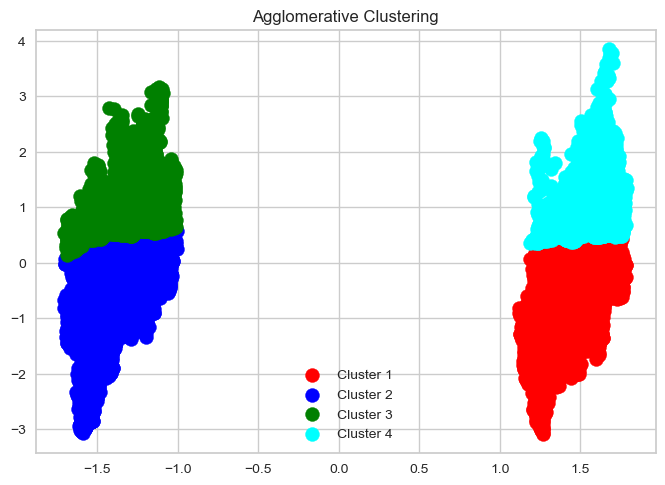

In [101]:
# Plot the results

plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_pca[y_hc == 3, 0], X_pca[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.title('Agglomerative Clustering')

plt.legend()
plt.show()

In [62]:
# Model evaluation

calinski_score = calinski_harabasz_score(X_pca, y_hc)
davies_score = davies_bouldin_score(X_pca, y_hc)
print(f'Calinski harabasz score: {calinski_score:.2f}')
print(f'Davies bouldin score: {davies_score:.2f}')

Calinski harabasz score: 43246.65
Davies bouldin score: 0.62


# DBSCAN

In [103]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Define the range of epsilon values
eps_range = np.arange(0.01, 1, 0.01)
min_samples_range = range(1, 10)

# Initialize lists to store scores
calinski_scores = np.zeros((len(eps_range), len(min_samples_range)))
davies_scores = np.zeros((len(eps_range), len(min_samples_range)))

for i, e in enumerate(eps_range):
    for j, m in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=e, min_samples=m)
        labels = dbscan.fit_predict(X_pca)
        calinski_score = calinski_harabasz_score(X_pca, labels)
        davies_score = davies_bouldin_score(X_pca, labels)
        calinski_scores[i, j] = calinski_score
        davies_scores[i, j] = davies_score

In [89]:
# Find epsilon and min_samples for max Calinski score
max_calinski_idx = np.unravel_index(np.argmax(calinski_scores), calinski_scores.shape)
best_eps_calinski = eps_range[max_calinski_idx[0]]
best_min_samples_calinski = min_samples_range[max_calinski_idx[1]]

# Find epsilon and min_samples for min Davies score
min_davies_idx = np.unravel_index(np.argmin(davies_scores), davies_scores.shape)
best_eps_davies = eps_range[min_davies_idx[0]]
best_min_samples_davies = min_samples_range[min_davies_idx[1]]

print("Epsilon and min_samples for maximum Calinski score:", best_eps_calinski, ",", best_min_samples_calinski)
print("Epsilon and min_samples for minimum Davies score:", best_eps_davies, ",", best_min_samples_davies)

Epsilon and min_samples for maximum Calinski score: 0.14 , 1
Epsilon and min_samples for minimum Davies score: 0.09 , 1


In [90]:
# Find the average of epsilon

print(f"Average epsilon is: {(best_eps_calinski+best_eps_davies)/2}")

Average epsilon is: 0.115


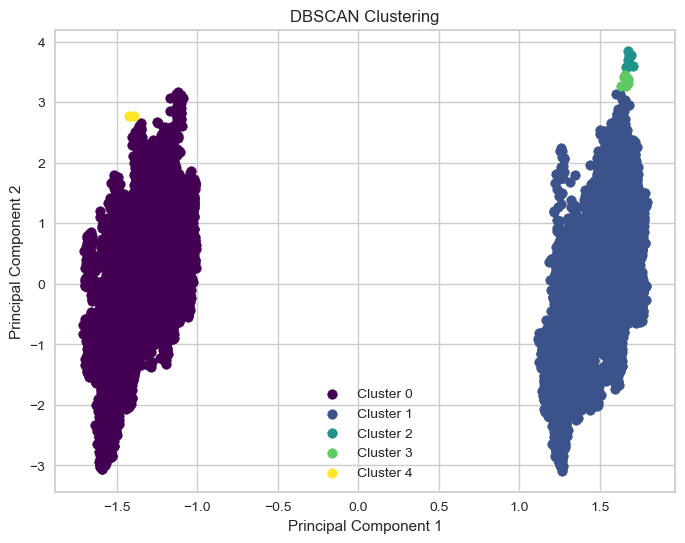

Calinski-Harabasz Score: 10460.28
Davies-Bouldin Score: 0.49


In [92]:
# Define the model and fit PCA data
dbscan = DBSCAN(eps=0.115, min_samples=1)
labels = dbscan.fit_predict(X_pca)

# Get unique labels and assign a color to each label
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot the results
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    if label == -1:
        # Assign black color to noise points
        color = 'k'
    else:
        color = colors[i]
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], c=color, label=f'Cluster {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

# Calculate clustering evaluation metrics
calinski_score = calinski_harabasz_score(X_pca, labels)
davies_score = davies_bouldin_score(X_pca, labels)
print(f'Calinski-Harabasz Score: {calinski_score:.2f}')
print(f'Davies-Bouldin Score: {davies_score:.2f}')

# Conclusion

## Comparing every model

1. **DBSCAN Clustering**:
   - CH Score: 10,460.28
   - DB Score: 0.49

2. **Agglomerative Clustering**:
   - CH Score: 43,246.65
   - DB Score: 0.62

3. **K-means Clustering**:
   - CH Score: 51,099.75
   - DB Score: 0.64

The high CH score for K-means suggests that it has found clusters with a good level of separation and tightness. However, the slightly higher DB score compared to DBSCAN implies that there may be more overlap between clusters.

**Choosing the Model:**
- **If the priority is to minimize within-cluster variance** (i.e., having tight clusters), the **K-means clustering** result with the highest CH score would be appropriate.
- **If the priority is to ensure that the clusters are well-separated** (regardless of their tightness), the **DBSCAN clustering** with the lowest DB score is preferable. This model will also identify outliers, which can be informative depending on your analysis goals.
- **Agglomerative clustering** is a middle-ground option that does not perform as well as the other two models on these metrics but may provide insight into the hierarchical relationships between clusters.

Seems K-means might be the most suitable choice based on the CH score. However, if the separation of clusters is more critical or the customer is interested in identifying outliers, DBSCAN would be the better choice.

## Insights for the business

The clusters I've identified using K-means provide valuable insights that can be leveraged in various business strategies:

1. **Targeted Marketing Campaigns**:
   - Tailor marketing messages based on the average income and preferred car price range in each cluster.
   - Highlight specific features like the engine type, body style, or color that are most common in each cluster.

2. **Inventory Management**:
   - Stock more of the models and colors that are popular in each cluster's region.
   - Predict the demand for specific types of cars based on the cluster characteristics.

3. **Sales Strategy**:
   - Train sales teams about the most preferred features in each cluster, like the transmission type or engine, to better address potential customer queries.
   - Implement sales strategies that are more likely to resonate with the demographic and income profiles of each cluster.

4. **Location-Based Strategy**:
   - Concentrate dealership promotions and discounts in regions like Greenville or Pasco, based on the identified clusters.
   - Offer trade-in deals or incentives for upgrading older models that are common within clusters to newer versions.

5. **Customer Relationship Management (CRM)**:
   - Use this data to personalize customer interactions and follow-ups.
   - Understand the potential financial bracket of customers to offer financing options tailored to their profiles.

6. **Pricing Strategy**:
   - Adjust pricing strategies for different regions and customer segments based on their average income and the typical price range of the cars they are interested in.

7. **Product Development**:
   - Give feedback to the manufacturers about popular features in different income brackets, which can influence future design and feature sets.

8. **Dealer Partnerships**:
   - Recognize which dealer (like "Tri-State Mack Inc" in your clusters) is successful in selling which type of vehicle, and potentially replicate this dealer's strategies in other regions or with other dealers.

9. **Market Segmentation**:
   - Refine market segmentation strategies using the detailed profiles from each cluster.

10. **After-Sale Services**:
    - Offer tailored after-sale services that align with the most common models and body styles within each cluster.

These strategies, informed by the clustering analysis, can help in creating a more focused business approach that is more likely to appeal to the specific preferences and needs of different customer segments. The key to effectively leveraging this information is to align business practices with the data-driven insights to enhance customer satisfaction, optimize inventory, and ultimately drive sales.